<a href="https://colab.research.google.com/github/yinglingyang/Data-Science-with-Python/blob/main/Rain_In_Australia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Rain In Australia: Exploratory Data Analysis And Feature Engineering




##Load Data
Dataset: https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv("/content/weatherAUS.csv")

## Data Description

In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
df.columns.tolist()

['Date',
 'Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RainTomorrow']

In [ ]:
df.shape

(145460, 23)

In [ ]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [ ]:
categorical_columns = [columns for columns in df.columns if df[columns].dtype == "O"]
print(len(categorical_columns))
print(categorical_columns)

7
['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [ ]:
numerical_columns = [columns for columns in df.columns if df[columns].dtype == "float64"]
print(len(numerical_columns))
print(numerical_columns)

16
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [ ]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

## Data Exploration

### 1 Distribution of Target

In [ ]:
count = df["RainTomorrow"].value_counts()
count

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

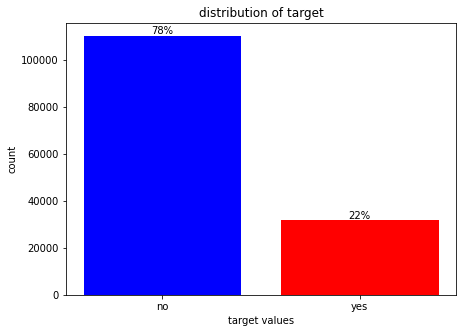

In [ ]:
plt.figure(figsize = (7,5))
graph = plt.bar(['no', 'yes'], count.values, color=['blue', 'red'])
plt.title('distribution of target')
plt.title('distribution of target')
plt.xlabel('target values')
plt.ylabel('count')

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
     
    plt.text(x+width/2,
             y+height*1.01+1,
             str(round(100*count[i]/df["RainTomorrow"].count()))+'%',
             ha='center')
    i += 1

plt.show()

Conclusion: 78% target is 'no', and 22% target is 'yes'. It is an imbalanced dataset. 

### 2  The Influence of Categorical Features on Target Distribution

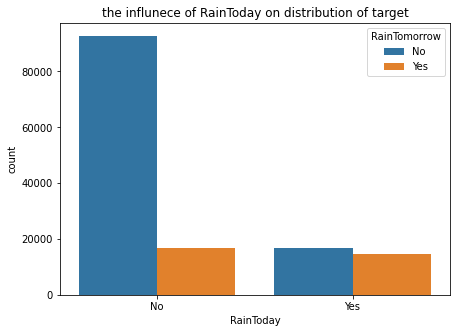

In [ ]:
plt.figure(figsize = (7,5))
sns.countplot(x = 'RainToday', hue = 'RainTomorrow', data = df)
plt.title('the influnece of RainToday on distribution of target')
plt.show()

Conclusion: There is a obvious relationship between 'RainToday' and the tagret. If 'RainToday' is no, it is more possible that 'RainTomorrow' is also no. 

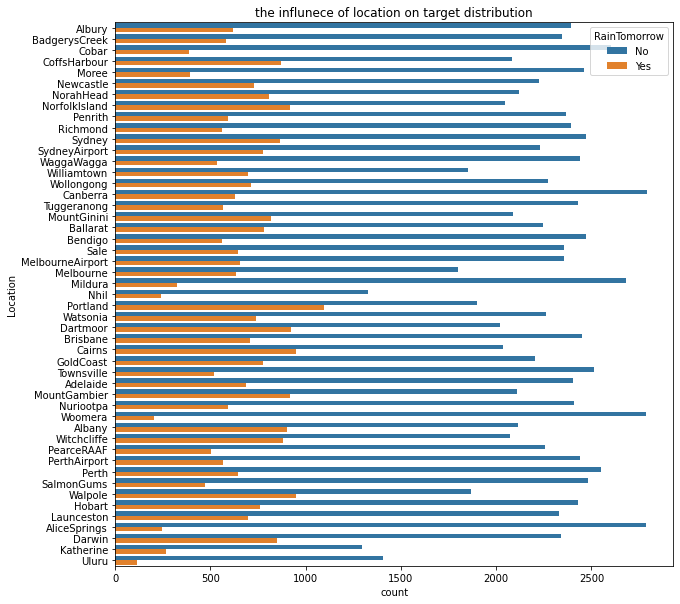

In [ ]:
plt.figure(figsize = (10,10))
sns.countplot(y = 'Location',hue = 'RainTomorrow', data = df)
plt.title('the influnece of location on target distribution')
plt.show()

Conclusion: Location has a significant influence on the target. The target distribution is different at different location. 

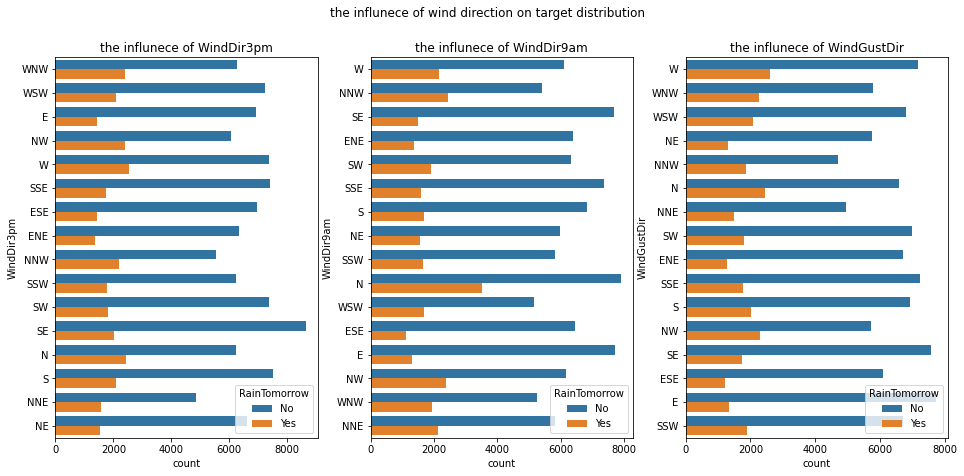

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 7))
sns.countplot(y = 'WindDir3pm',hue = 'RainTomorrow', data = df, ax = ax1)
ax1.set(title='the influnece of WindDir3pm')
sns.countplot(y = 'WindDir9am',hue = 'RainTomorrow', data = df, ax = ax2)
ax2.set(title='the influnece of WindDir9am')
sns.countplot(y = 'WindGustDir',hue = 'RainTomorrow', data = df, ax = ax3)
ax3.set(title='the influnece of WindGustDir')
fig.suptitle("the influnece of wind direction on target distribution")
plt.show()

Conclusion: Wind direction can affect the rain possibility of tomorrow. When WindGustDir is WNW, the rain possibility of tomorrow is a little higher. When WindGustDir is E, the rain possibility of tomorrow is a litter lower.  

### 3 The Influence of Numerical Features on Target Distribution

The Distribution of Numerical Features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff989cdcad0>,
      dtype=object)

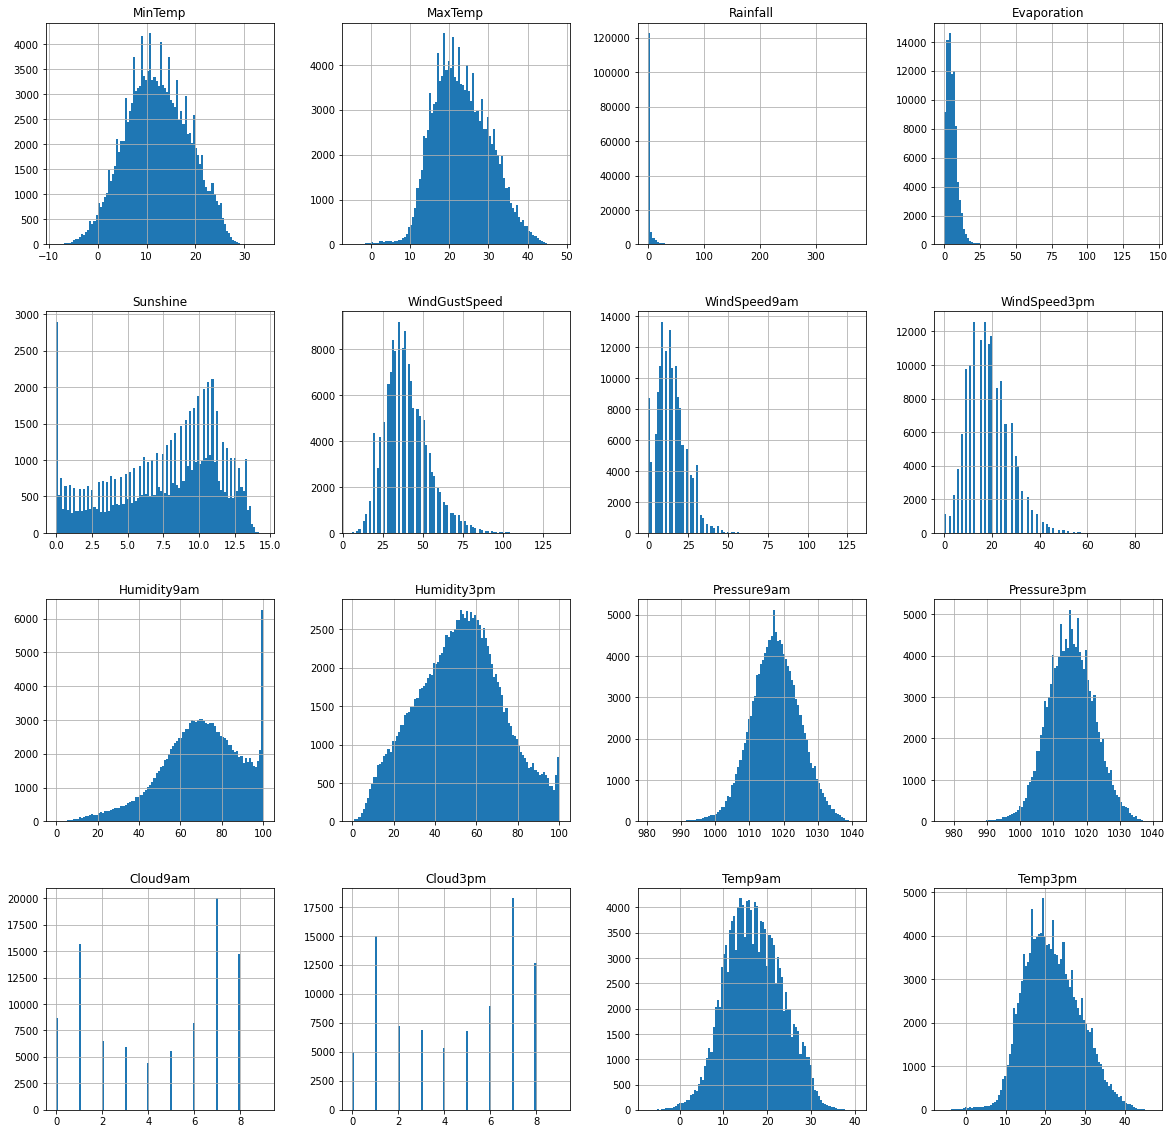

In [ ]:
df[numerical_columns].hist(figsize=(20, 20), bins=100)

Conclusion of Histograms: Some numerical features are nomal distributted, such as MinTemp and Pressure9am. Some numercial features are skewed, such as Rainfall and Evaporation.

The Influence of Numerical Features

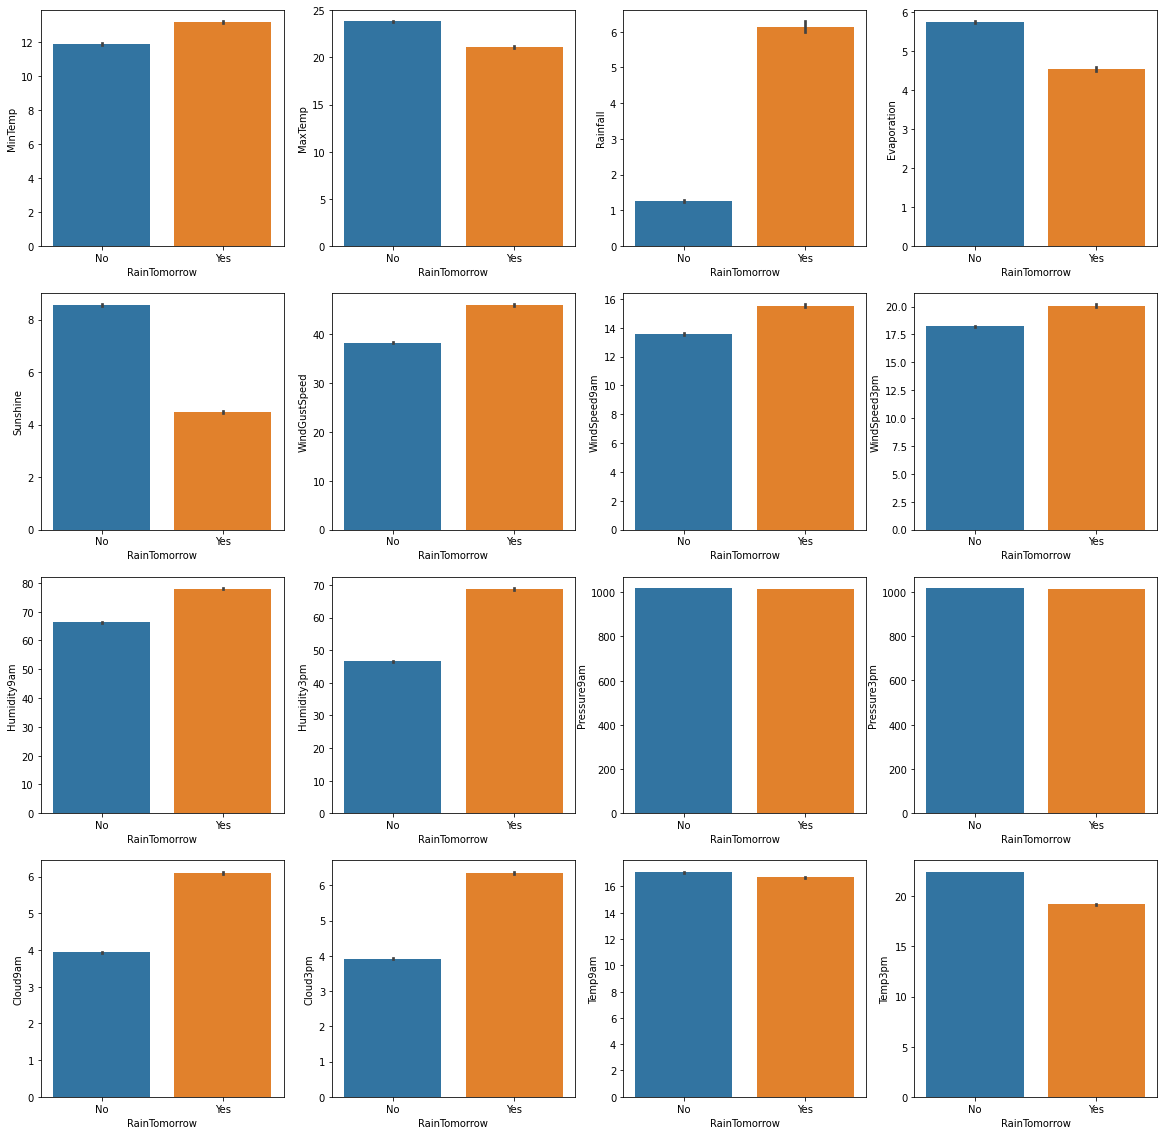

In [ ]:
plt.figure(figsize = (20,20))
for i, col in enumerate(numerical_columns):
    plt.subplot(4,4,i+1)
    sns.barplot(x='RainTomorrow', y = col, data = df)
plt.show()

Conclusion of Barplots: Some features, such as Humidity3pm, Cloud3pm, Rainfall and Sunshine change dramictically with target, which suggests there is strong relationship between them and target.

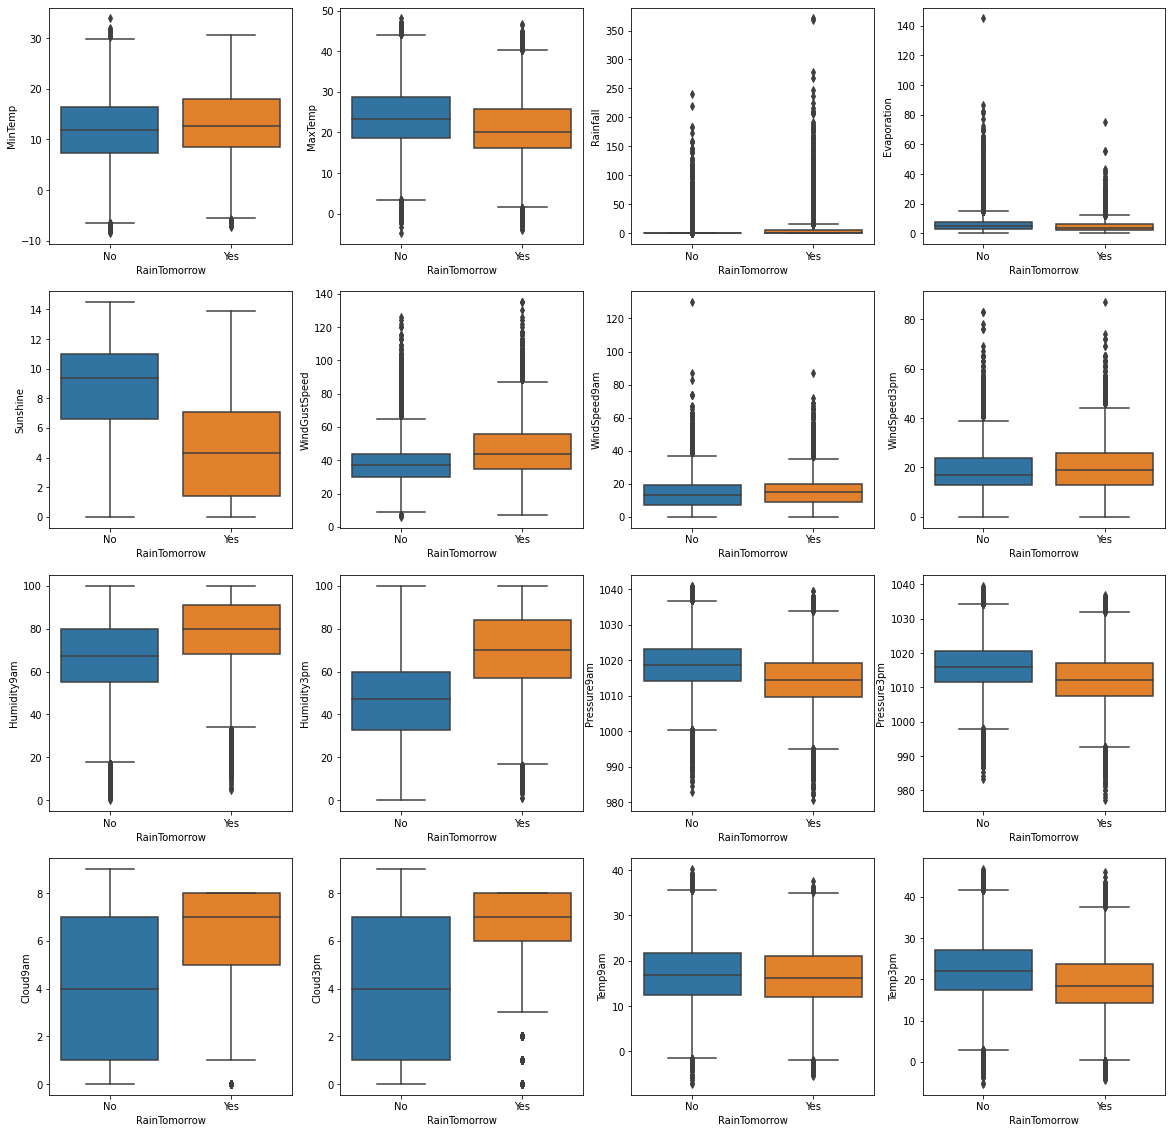

In [ ]:
plt.figure(figsize = (20,20))
for i, col in enumerate(numerical_columns):
    plt.subplot(4,4,i+1)
    sns.boxplot(x='RainTomorrow', y = col, data = df)
plt.show()

Conclusion of Barplots: There are many outliers in some numerical features, such as Rainfall and Evaporation. Considering that these data points are field-collected and extreme weather is becoming more frequent, I regard these exceptions are a reflection of the facts themselves, not due to mistakes or anomalies. These data points also contain important and real information.

Transform Date feature into numerical features

In [ ]:
df["Date"] = pd.to_datetime(df["Date"])
df["year"] = df["Date"].dt.year
df["month"] = df["Date"].dt.month
df["day"] = df["Date"].dt.day
df.drop("Date", axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        143975 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       142199 non-null  float64
 4   Evaporation    82670 non-null   float64
 5   Sunshine       75625 non-null   float64
 6   WindGustDir    135134 non-null  object 
 7   WindGustSpeed  135197 non-null  float64
 8   WindDir9am     134894 non-null  object 
 9   WindDir3pm     141232 non-null  object 
 10  WindSpeed9am   143693 non-null  float64
 11  WindSpeed3pm   142398 non-null  float64
 12  Humidity9am    142806 non-null  float64
 13  Humidity3pm    140953 non-null  float64
 14  Pressure9am    130395 non-null  float64
 15  Pressure3pm    130432 non-null  float64
 16  Cloud9am       89572 non-null   float64
 17  Cloud3pm       86102 non-null

In [ ]:
categorical_columns = [columns for columns in df.columns if df[columns].dtype == "O"]
categorical_columns

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [ ]:
numerical_columns = [columns for columns in df.columns if df[columns].dtype == "float64"]
numerical_columns

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

The influnece of date on target distribution

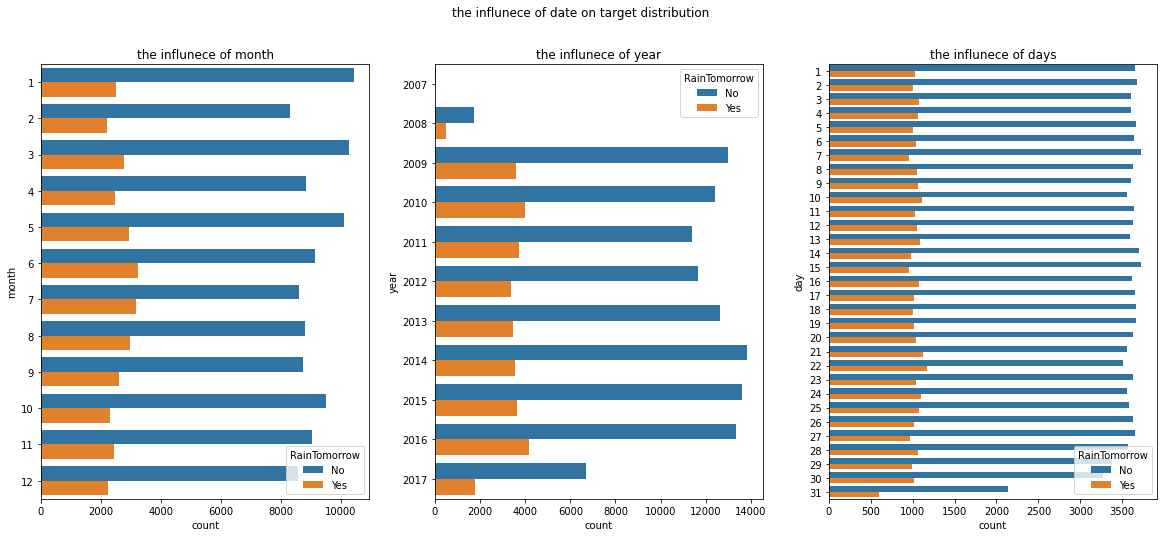

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 8))
sns.countplot(y = 'month',hue = 'RainTomorrow', data = df, ax = ax1)
ax1.set(title='the influnece of month')
sns.countplot(y = 'year',hue = 'RainTomorrow', data = df, ax = ax2)
ax2.set(title='the influnece of year')
sns.countplot(y = 'day',hue = 'RainTomorrow', data = df, ax = ax3)
ax3.set(title='the influnece of days')
fig.suptitle("the influnece of date on target distribution")
plt.show()

In [ ]:
df = pd.get_dummies(df, columns=['RainTomorrow'], drop_first=True)  # transform target into the numerical variable.
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,year,month,day,RainTomorrow_Yes
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,2008,12,1,0
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,2008,12,2,0
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,2008,12,3,0
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,2008,12,4,0
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,2008,12,5,0


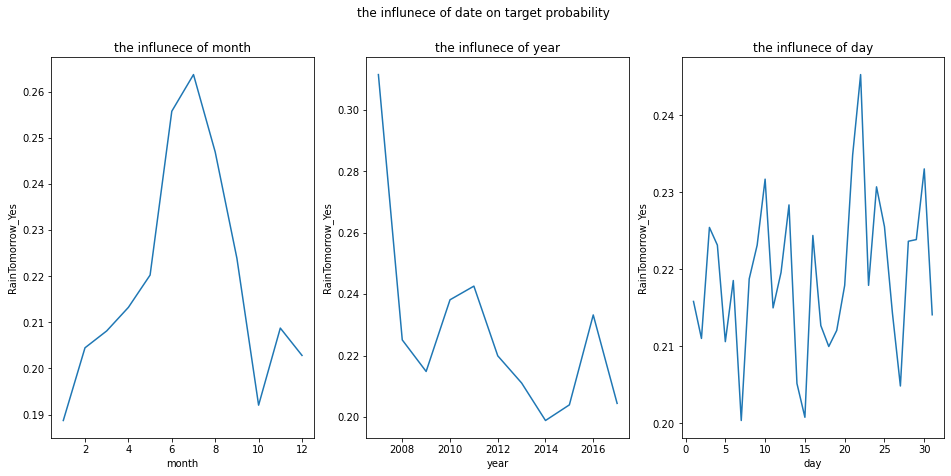

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 7))
sns.lineplot(x = 'month', y = 'RainTomorrow_Yes', data = df.groupby('month').mean(), ax = ax1)
ax1.set(title='the influnece of month')
sns.lineplot(x = 'year', y= 'RainTomorrow_Yes', data = df.groupby('year').mean(), ax = ax2)
ax2.set(title='the influnece of year')
sns.lineplot(x = 'day', y = 'RainTomorrow_Yes', data = df.groupby('day').mean(), ax = ax3)
ax3.set(title='the influnece of day')
fig.suptitle("the influnece of date on target probability")
plt.show()

Conclusion: Both countplots and lineplots show that the date can affect the probability of the target. For example, the rain possibility is higher between month 6 and month 8. 

Compare trend between target and other numerical features

In [ ]:
import matplotlib.gridspec as gridspec

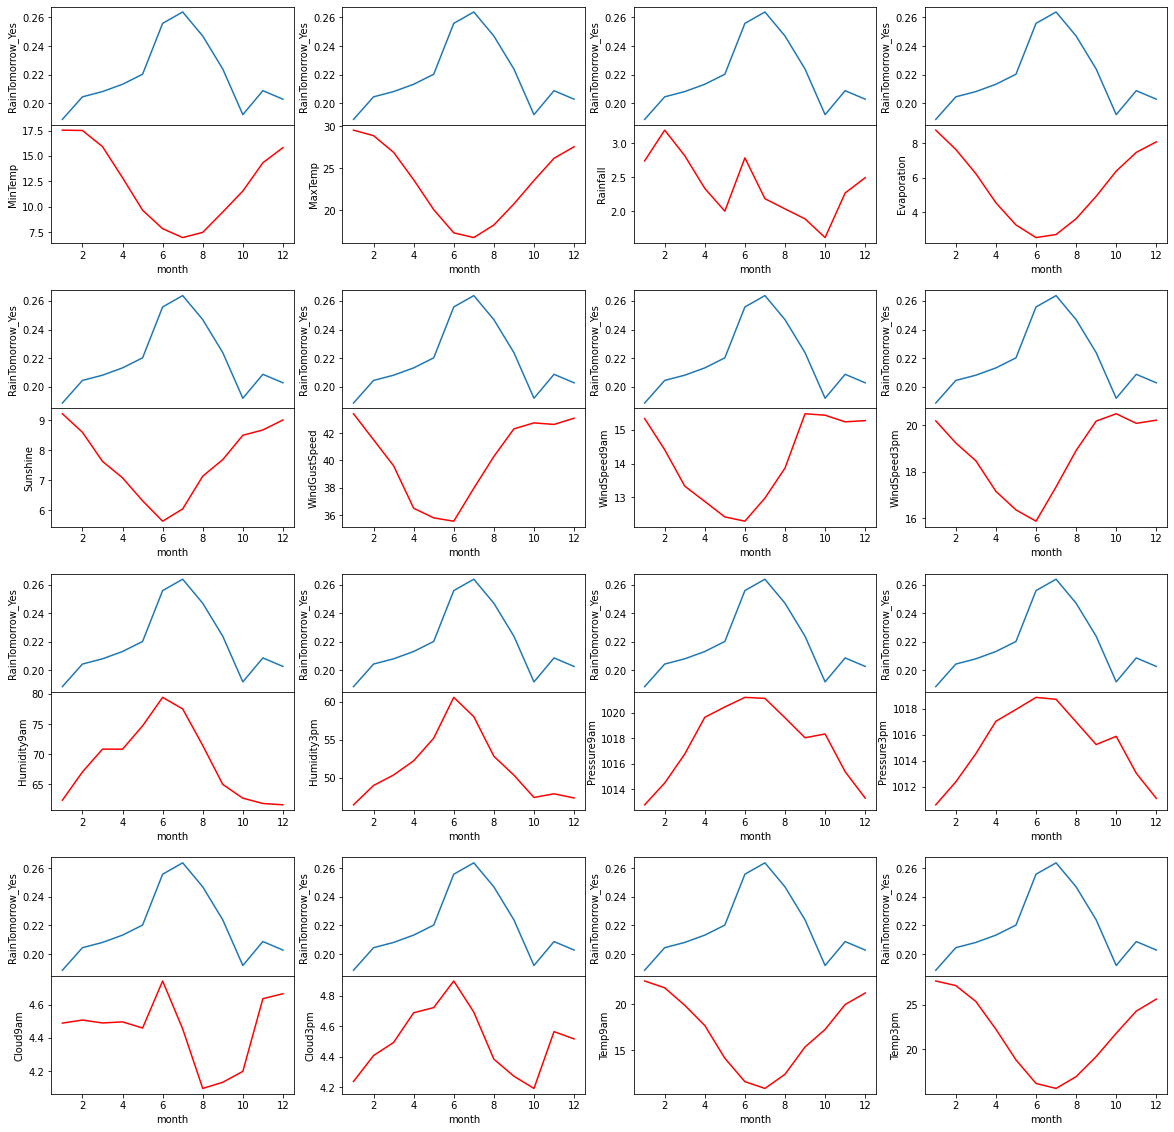

In [ ]:
month = [1,2,3,4,5,6,7,8,9,10,11,12]

fig = plt.figure(figsize=(20, 20))
outer = gridspec.GridSpec(4, 4, wspace=0.2, hspace=0.2)

for i, col in enumerate(numerical_columns):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,
                    subplot_spec=outer[i], wspace=0.1, hspace=0)
    ax1 = plt.Subplot(fig, inner[0])
    ax1.plot(month, df.groupby('month').mean()['RainTomorrow_Yes'])
    ax1.set_ylabel('RainTomorrow_Yes')
    fig.add_subplot(ax1)
    ax2 = plt.Subplot(fig, inner[1])
    ax2.plot(month, df.groupby(by='month').mean()[col], 'r')
    ax2.set_xlabel('month')
    ax2.set_ylabel(col)
    fig.add_subplot(ax2)
plt.show()   

Conclusion: Comparing to the target, some features show the opposite trend, such as Sunshine and Evaporation, and other features show the same trend, such as Humidity3pm and Cloud3pm. It suggest there is strong relationship between target and them.

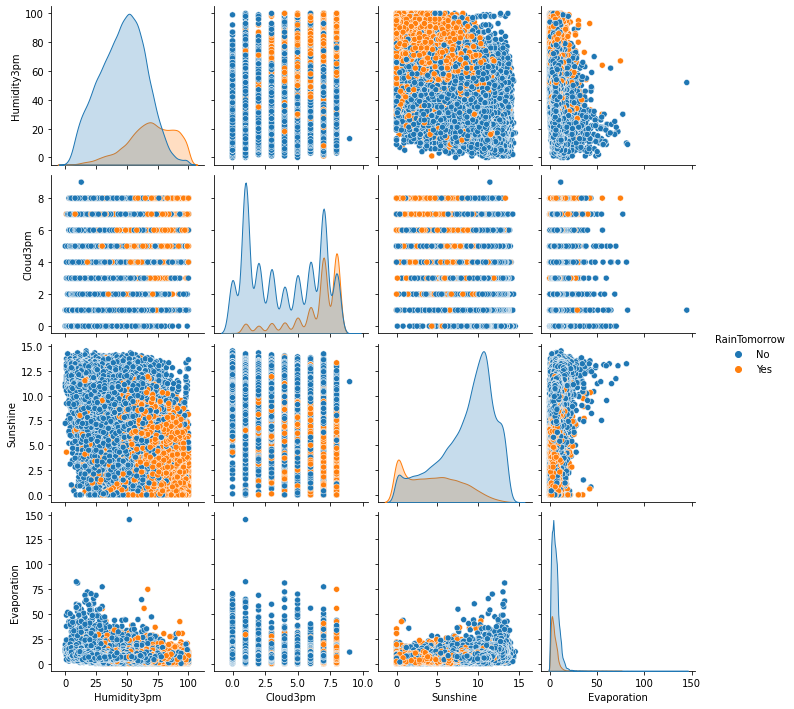

In [ ]:
df = pd.read_csv("/content/weatherAUS.csv")
sns.pairplot(df[['Humidity3pm','Cloud3pm','Sunshine', 'Evaporation', 'RainTomorrow']], hue='RainTomorrow')

Conclusion: The pairplots also show strong relationship between the target and some features (Humidity3pm, Cloud3pm, Sunshine and Evaporation). It is more possible to rain on high humidity and more clouds, and it is less possible when sunshine and evaporation is high.

## Data Cleaning and Feature Engineering

1, Transform Date into numerical features

In [ ]:
df = pd.read_csv("/content/weatherAUS.csv")

In [ ]:
df["Date"] = pd.to_datetime(df["Date"])
df["year"] = df["Date"].dt.year
df["month"] = df["Date"].dt.month
df["day"] = df["Date"].dt.day
df.drop("Date", axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        143975 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       142199 non-null  float64
 4   Evaporation    82670 non-null   float64
 5   Sunshine       75625 non-null   float64
 6   WindGustDir    135134 non-null  object 
 7   WindGustSpeed  135197 non-null  float64
 8   WindDir9am     134894 non-null  object 
 9   WindDir3pm     141232 non-null  object 
 10  WindSpeed9am   143693 non-null  float64
 11  WindSpeed3pm   142398 non-null  float64
 12  Humidity9am    142806 non-null  float64
 13  Humidity3pm    140953 non-null  float64
 14  Pressure9am    130395 non-null  float64
 15  Pressure3pm    130432 non-null  float64
 16  Cloud9am       89572 non-null   float64
 17  Cloud3pm       86102 non-null

2, Deal with missing values (for categorical features, use most repetitive value; for numerical features, use mean value)

In [ ]:
categorical_columns = [columns for columns in df.columns if df[columns].dtype == "O"]
categorical_columns

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [ ]:
numerical_columns = [columns for columns in df.columns if df[columns].dtype == "float64"]
numerical_columns

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [ ]:
df[categorical_columns].isnull().sum()

Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

In [ ]:
for col in categorical_columns:
    if df[col].isnull().sum():
        df[col] = df[col].fillna(df[col].mode()[0])
df[categorical_columns].isnull().sum()

Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

In [ ]:
df[numerical_columns].isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
dtype: int64

In [ ]:
for col in numerical_columns:
    if df[col].isnull().sum():
        df[col] = df[col].fillna(df[col].mean())
df[numerical_columns].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

3, Log transforming skewed variables

In [ ]:
skew_limit = 0.75 
skew_vals = df[numerical_columns].skew()
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

skew_cols   # list skew variables

,Skew
Rainfall,9.948369
Evaporation,4.989198
WindGustSpeed,0.907477
WindSpeed9am,0.782396


In [ ]:
for col in skew_cols.index.values:
    df[col] = df[col].apply(np.log1p)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff963680250>,
      dtype=object)

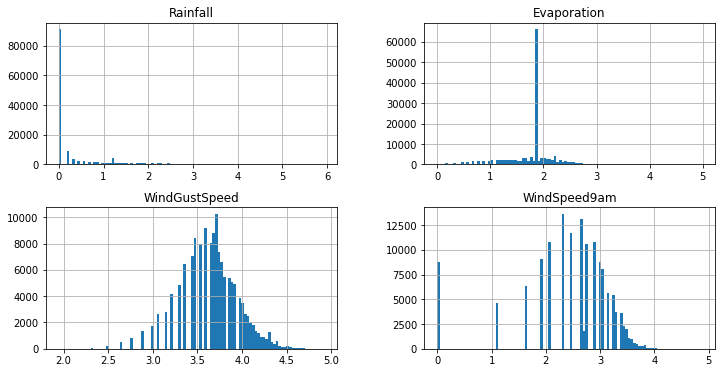

In [ ]:
df[['Rainfall','Evaporation', 'WindGustSpeed', 'WindSpeed9am']].hist(figsize=(12, 6), bins=100)

4, One-hot encoding

In [ ]:
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True) 
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,year,month,day,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,...,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes,RainTomorrow_Yes
0,13.4,22.9,0.470004,1.866903,7.611178,3.806662,3.044522,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,2008,12,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,7.4,25.1,0.000000,1.866903,7.611178,3.806662,1.609438,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,2008,12,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,12.9,25.7,0.000000,1.866903,7.611178,3.850148,2.995732,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,2008,12,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,9.2,28.0,0.000000,1.866903,7.611178,3.218876,2.484907,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,2008,12,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,0.693147,1.866903,7.611178,3.737670,2.079442,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,2008,12,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


##Hypothesis Testing

### hypothesis 1:
    Null hypothesis (H0): there is no relationship between Humidity3pm and the target.
    Alternative hypothesis (H1): there is a relationship between Humidity3pm and the target

### hypothesis 2:
    Null hypothesis (H0): there is no relationship between RainToday and the target
    Alternative hypothesis (H1): there is no relationship between RainToday and the target

### hypothesis 3:
    Null hypothesis (H0): there is no relationship between WindGustDir and the target
    Alternative hypothesis (H1): there is a relationship between RainToday and the target
    

### Use chi square method to test hypotheses. 

If p value is lower 0.05, then the null hypothesis (H0) is rejected, and alternative hypothesis (H1) is accepted. If p value is higher or equal 0.05, then H0 is accepted.

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
df = pd.read_csv("/content/weatherAUS.csv")

In [ ]:
crosstab = pd.crosstab(df.RainTomorrow, df.RainToday)
crosstab

RainToday,No,Yes
RainTomorrow,,
No,92728,16858
Yes,16604,14597


In [ ]:
chi2_contingency(crosstab)

(13799.479649324368, 0.0, 1, array([[85102.00907754, 24483.99092246],
        [24229.99092246,  6971.00907754]]))

In [ ]:
p = chi2_contingency(crosstab)[1]
p

0.0

Conclusion: P value is 0, far less than 0.05. So the null hypothesis is rejected. There is a relationship between RainToday and RainTomorrow.

In [ ]:
crosstab = pd.crosstab(df.RainTomorrow, df.WindGustDir)
crosstab

WindGustDir,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
RainTomorrow,,,,,,,,,,,,,,,,
No,7721,6704,6105,6581,5741,4952,4698,5719,6932,7576,7238,6713,6993,7173,5791,6816
Yes,1350,1288,1200,2452,1319,1481,1863,2284,2017,1733,1755,1897,1804,2607,2275,2085


In [ ]:
chi2_contingency(crosstab)

(1519.9012419828084,
 0.0,
 15,
 array([[7063.08124158, 6222.92418506, 5687.99564213, 7033.49276322,
         5497.22782114, 5009.01792824, 5108.68438166, 6231.4892709 ,
         6968.08665317, 7248.3985534 , 7002.34699653, 6704.12628045,
         6849.73273974, 7615.1399562 , 6280.54385344, 6930.71173314],
        [2007.91875842, 1769.07581494, 1617.00435787, 1999.50723678,
         1562.77217886, 1423.98207176, 1452.31561834, 1771.5107291 ,
         1980.91334683, 2060.6014466 , 1990.65300347, 1905.87371955,
         1947.26726026, 2164.8600438 , 1785.45614656, 1970.28826686]]))

In [ ]:
p = chi2_contingency(crosstab)[1]
p

0.0

Conclusion: P value is 0, far less than 0.05. So the null hypothesis is rejected. There is a relationship between WindGustDir and RainTomorrow.